# Vilnius flat market exploratory analysis

The aim of this project is to make exploratory analysis of Vilnius flat market. The data for this project was obtained by scrapping listings from real estate webpage [aruodas.lt](https://www.aruodas.lt/butai/vilniuje/). Only info about flats for sale in Vilnius was scrapped. The Python library Beautifulsoup was used for scarpping. The additional source of data is info about registered inhabitants of Vilnius obtained from https://github.com/vilnius



## Loading and cleaninig data
First of all we load all the necessary libraries

In [612]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Next we load the scrapped data with info on flats

In [613]:
aruodas=pd.read_csv(r"C:\Users\Paulius\aruodas\lentele_final.csv",skipinitialspace=True)

Lets inspects the data a bit: how big  is the data(rows,columns), also lets view a few lines of data.

In [614]:
aruodas.shape

(3400, 17)

In [615]:
aruodas.head(10)

,"""""",informacija,kaina,kaina_kv,plotas,kambariai,aukstas,metai,tipas,sildymas,irengimas,darzelis,mokykla,parduotuve,transportas,nusikaltimai,sildymo_kaina
0,0,"Vilnius, Visoriai, Mykolo Sleževičiaus g., 2 k...",62 500 €,(1 614 €/m²),"38,73 m²",2,3,2019,Mūrinis,Centrinis kolektorinis,Dalinė apdaila ...,730 m,530 m,890 m,380 m,2,NaN
1,1,"Vilnius, Burbiškės, Burbiškių g., 2 kambarių b...",85 629 €,(1 740 €/m²),"49,2 m²",2,1,2019,Mūrinis,Dujinis,Dalinė apdaila ...,"1,4 km",1 km,"1,1 km",960 m,0,NaN
2,2,"Vilnius, Šeškinė, Ozo g., 3 kambarių butas",118 000 €,(1 960 €/m²),"60,2 m²",3,4,2020,Mūrinis,Centrinis kolektorinis,Dalinė apdaila ...,590 m,220 m,580 m,200 m,1,NaN
3,3,"Vilnius, Naujoji Vilnia, Pramonės g., 1 kambar...",12 000 €,(632 €/m²),19 m²,1,2,1990,Mūrinis,"Centrinis, dujinis",Dalinė apdaila ...,520 m,450 m,540 m,80 m,6,NaN
4,4,"Vilnius, Senamiestis, Žygimantų g., 2 kambarių...",159 700 €,(3 100 €/m²),"51,52 m²",2,1,2021,Mūrinis,Centrinis kolektorinis,Dalinė apdaila ...,460 m,240 m,270 m,220 m,29,NaN
5,5,"Vilnius, Pilaitė, M. Mažvydo g., 2 kambarių butas",98 000 €,(1 646 €/m²),"59,55 m²",2,3,2007,Mūrinis,Centrinis kolektorinis,Įrengtas ...,110 m,570 m,250 m,170 m,4,"40,49 €/mėn.\n0,68 €/m²"
6,6,"Vilnius, Senamiestis, Kaštonų g., 2 kambarių b...",215 000 €,(2 654 €/m²),81 m²,2,2,1940,Mūrinis,Centrinis,Įrengtas ...,650 m,490 m,200 m,170 m,28,"69,66 €/mėn.\n0,86 €/m²"
7,7,"Vilnius, Žirmūnai, P. Vileišio g., 2 kambarių ...",133 500 €,(2 660 €/m²),"50,19 m²",2,2,2019,Mūrinis,Centrinis kolektorinis,Įrengtas ...,260 m,250 m,190 m,130 m,7,NaN
8,8,"Vilnius, Senamiestis, Krivių g., 4 kambarių butas",289 000 €,(3 372 €/m²),"85,71 m²",4,3,2007,Mūrinis,Centrinis kolektorinis,Įrengtas ...,280 m,90 m,660 m,270 m,5,NaN
9,9,"Vilnius, Antakalnis, V. Grybo g., 4 kambarių b...",192 120 €,(2 099 €/m²),"91,52 m²",4,2,2019,Mūrinis,Kita,Dalinė apdaila ...,110 m,350 m,370 m,420 m,9,NaN


We can see that we got 3400 rows and 17 columns of data. At first glimpse we can identify a few problems, that we should fix:
*  There is unnecessary unamed columed, which should be droped out.
*  The column **informacija** contains info about neibourghood and street, so it should be split into several columns.The same should be done with column **sildymo_kaina**, as it contains heating price per sq.meter and total heating price.
* Some values of column **metai** contains info of when building was built anr renoveted, so it should be splitted too.
* Columns **kaina**,**kaina_kv**,**plotas** contains non numeric charecters, which should be deleted.
* Columns **darzelis**,**mokykla**,**parduotuve**,**transportas** contains info which in some cases are in different units (m or km), we should transform all values to meters and deleted non numeric characters.
* Column **irengimas** have trailing whitespace and unnecessary values.

So lets clean the data
    

Splitting column **informacija** into 4 columns.

In [616]:
aruodas=aruodas.join(aruodas["informacija"].str.split(",",expand=True).rename(columns={0:"Miestas",1:"Rajonas",2:"Gatvė",3:"info"}))

Splitting column **metai** into 2 columns

In [617]:
aruodas=aruodas.join(aruodas["metai"].str.split(",",expand=True).rename(columns={0:"metai_s",1:"metai_r"}))

In [618]:
aruodas.head()

,"""""",informacija,kaina,kaina_kv,plotas,kambariai,aukstas,metai,tipas,sildymas,...,parduotuve,transportas,nusikaltimai,sildymo_kaina,Miestas,Rajonas,Gatvė,info,metai_s,metai_r
0,0,"Vilnius, Visoriai, Mykolo Sleževičiaus g., 2 k...",62 500 €,(1 614 €/m²),"38,73 m²",2,3,2019,Mūrinis,Centrinis kolektorinis,...,890 m,380 m,2,NaN,Vilnius,Visoriai,Mykolo Sleževičiaus g.,2 kambarių butas,2019,None
1,1,"Vilnius, Burbiškės, Burbiškių g., 2 kambarių b...",85 629 €,(1 740 €/m²),"49,2 m²",2,1,2019,Mūrinis,Dujinis,...,"1,1 km",960 m,0,NaN,Vilnius,Burbiškės,Burbiškių g.,2 kambarių butas,2019,None
2,2,"Vilnius, Šeškinė, Ozo g., 3 kambarių butas",118 000 €,(1 960 €/m²),"60,2 m²",3,4,2020,Mūrinis,Centrinis kolektorinis,...,580 m,200 m,1,NaN,Vilnius,Šeškinė,Ozo g.,3 kambarių butas,2020,None
3,3,"Vilnius, Naujoji Vilnia, Pramonės g., 1 kambar...",12 000 €,(632 €/m²),19 m²,1,2,1990,Mūrinis,"Centrinis, dujinis",...,540 m,80 m,6,NaN,Vilnius,Naujoji Vilnia,Pramonės g.,1 kambario butas,1990,None
4,4,"Vilnius, Senamiestis, Žygimantų g., 2 kambarių...",159 700 €,(3 100 €/m²),"51,52 m²",2,1,2021,Mūrinis,Centrinis kolektorinis,...,270 m,220 m,29,NaN,Vilnius,Senamiestis,Žygimantų g.,2 kambarių butas,2021,None


Getting rid of unnecessary columns

In [619]:
aruodas=aruodas.drop(aruodas.columns[[0, 1,7, 17,20]], axis=1)

Arranging the order of columns

In [620]:
cols=aruodas.columns.tolist()
cols
cols.insert(0,cols.pop(cols.index('Rajonas')))
cols.insert(1,cols.pop(cols.index('Gatvė')))
cols.insert(5,cols.pop(cols.index("metai_s")))
cols.insert(6,cols.pop(cols.index("metai_r")))
cols
aruodas = aruodas.reindex(columns= cols)

Turning values to meters and getting rid of non numeric values

In [621]:
def valymas(x):
    c=[]
    for y in x:
        if "km" in y:
            y=re.sub("\D",'',y)
            if len(y)==2:
                y=int(y)*100
            else:
                y=int(y)*1000
            c.append(y)
        else:
            y=re.sub("\D",'',y)
            y=int(y)
            c.append(y)
    listas=np.array(c)
    return listas

aruodas[["darzelis","mokykla","parduotuve","transportas"]]=aruodas[["darzelis","mokykla","parduotuve","transportas"]].apply(valymas)
aruodas = aruodas.apply(lambda x: x.str.replace(r"[^0-9.,]",'') if x.name in ['kaina', 'kaina_kv','plotas',"metai_s","metai_r"] else x)


                    


Splitting column **sildymo_kaina** into two columns

In [622]:
aruodas=aruodas.join(aruodas["sildymo_kaina"].str.split(".",expand=True).rename(columns={0:"Šildymo kaina",1:"Šildymo kaina_kv"}))

In [623]:
#aruodas = aruodas.apply(lambda x: x.str.replace("€/mėn","").str.replace("€/m²","").str.replace("\n","") if x.name in ["Šildymo kaina","Šildymo kaina_kv"] else x)
aruodas = aruodas.apply(lambda x: x.str.replace(r"[^0-9.,]",'') if x.name in  ["Šildymo kaina","Šildymo kaina_kv"] else x)
aruodas=aruodas.drop(aruodas.columns[-3], axis=1)
aruodas = aruodas.apply(lambda x: x.str.replace(",",'.') if x.name in  ["Šildymo kaina","Šildymo kaina_kv","plotas","kaina_kv"] else x)


Dealing with trailing charchters and whitesspace

In [624]:
aruodas["irengimas"]=aruodas["irengimas"].str.replace("\xa0\xa0","").str.strip()



Let's take a lookk at data

In [625]:
aruodas.head(10)

,Rajonas,Gatvė,kaina,kaina_kv,plotas,metai_s,metai_r,kambariai,aukstas,tipas,sildymas,irengimas,darzelis,mokykla,parduotuve,transportas,nusikaltimai,Šildymo kaina,Šildymo kaina_kv
0,Visoriai,Mykolo Sleževičiaus g.,62500,1614,38.73,2019,None,2,3,Mūrinis,Centrinis kolektorinis,Dalinė apdaila,730,530,890,380,2,NaN,NaN
1,Burbiškės,Burbiškių g.,85629,1740,49.2,2019,None,2,1,Mūrinis,Dujinis,Dalinė apdaila,1400,1000,1100,960,0,NaN,NaN
2,Šeškinė,Ozo g.,118000,1960,60.2,2020,None,3,4,Mūrinis,Centrinis kolektorinis,Dalinė apdaila,590,220,580,200,1,NaN,NaN
3,Naujoji Vilnia,Pramonės g.,12000,632,19,1990,None,1,2,Mūrinis,"Centrinis, dujinis",Dalinė apdaila,520,450,540,80,6,NaN,NaN
4,Senamiestis,Žygimantų g.,159700,3100,51.52,2021,None,2,1,Mūrinis,Centrinis kolektorinis,Dalinė apdaila,460,240,270,220,29,NaN,NaN
5,Pilaitė,M. Mažvydo g.,98000,1646,59.55,2007,None,2,3,Mūrinis,Centrinis kolektorinis,Įrengtas,110,570,250,170,4,40.49,0.68
6,Senamiestis,Kaštonų g.,215000,2654,81,1940,None,2,2,Mūrinis,Centrinis,Įrengtas,650,490,200,170,28,69.66,0.86
7,Žirmūnai,P. Vileišio g.,133500,2660,50.19,2019,None,2,2,Mūrinis,Centrinis kolektorinis,Įrengtas,260,250,190,130,7,NaN,NaN
8,Senamiestis,Krivių g.,289000,3372,85.71,2007,None,4,3,Mūrinis,Centrinis kolektorinis,Įrengtas,280,90,660,270,5,NaN,NaN
9,Antakalnis,V. Grybo g.,192120,2099,91.52,2019,None,4,2,Mūrinis,Kita,Dalinė apdaila,110,350,370,420,9,NaN,NaN


It seems that everything as it supose to be. Now check if there are any duplicate rows

In [626]:
aruodas[aruodas.duplicated()].shape

(500, 19)

 It seems that we have to get rid of 500 rows,which are duplicates. Let's do it 

In [627]:
aruodas=aruodas.drop_duplicates(keep="first")

We can also check if all the rows contains correct information on every column.

In [628]:
aruodas["Rajonas"].unique()

array([' Visoriai', ' Burbiškės', ' Šeškinė', ' Naujoji Vilnia',
       ' Senamiestis', ' Pilaitė', ' Žirmūnai', ' Antakalnis',
       ' Šnipiškės', ' Pašilaičiai', ' Valakampiai', ' Bajorai',
       ' Viršuliškės', ' Naujamiestis', ' Fabijoniškės', ' Užupis',
       ' Žemieji Paneriai', ' Naujininkai', ' Filaretai', ' Žvėrynas',
       ' Santariškės', ' Šiaurės miestelis', ' Baltupiai', ' Justiniškės',
       ' Grigiškės', ' Tarandė', ' Lazdynai', ' Gineitiškės',
       ' Karoliniškės', ' Dvarčionys', ' Trakų Vokė', ' Lazdynėliai',
       ' Jeruzalė', ' Verkiai', ' V. Pietario g.', ' Saulėtekis',
       ' Markučiai', ' Kalnėnai', ' Pavilnys', ' Balsiai', ' Liepkalnis',
       ' Vilkpėdė', ' Salininkai', ' Aukštieji Paneriai', ' Turniškės',
       ' Paneriai', ' Rasos', ' Avižieniai', ' Pagiriai', ' Zujūnai',
       ' Antavilis', ' Kirtimai', ' Užusieniai', ' Didieji Gulbinai',
       ' Buivydiškės'], dtype=object)

We can see that one of the value of neighbourhood is actually is a street name V.Pietario g. So we should check, which row/s is it and what could be done about that.

In [629]:
aruodas.loc[aruodas["Rajonas"]== ' V. Pietario g.']



,Rajonas,Gatvė,kaina,kaina_kv,plotas,metai_s,metai_r,kambariai,aukstas,tipas,sildymas,irengimas,darzelis,mokykla,parduotuve,transportas,nusikaltimai,Šildymo kaina,Šildymo kaina_kv
351,V. Pietario g.,3 kambarių butas,79000,1411,56,1963,None,3,4,Blokinis,Centrinis,Įrengtas,330,290,210,200,12,35.28,0.63


It's only one row and it can be easily fixed, so that this row can be remained.

In [630]:
aruodas.loc[351,"Rajonas"]='Naujamiestis'
aruodas.loc[351,"Gatvė"]='V. Pietario g.'
aruodas.loc[351,:]

Rajonas               Naujamiestis
Gatvė               V. Pietario g.
kaina                        79000
kaina_kv                      1411
plotas                          56
metai_s                       1963
metai_r                       None
kambariai                        3
aukstas                          4
tipas                     Blokinis
sildymas                 Centrinis
irengimas                 Įrengtas
darzelis                       330
mokykla                        290
parduotuve                     210
transportas                    200
nusikaltimai                    12
Šildymo kaina                35.28
Šildymo kaina_kv              0.63
Name: 351, dtype: object

The first data set is prepared, so we will load the another one, which contains info on inhabitants.

In [631]:
vilnius=pd.read_csv('Downloads/Vilnius.csv')
vilnius.head()

,GIMIMO_METAI,GIMIMO_VALSTYBE,LYTIS,SEIMOS_PADETIS,KIEK_TURI_VAIKU,SENIUNIJA,GATVE,SENIUNNR,TER_REJ_KODAS,GATV_K,GAT_ID
0,1981,LTU,V,V,3,Verkiai,Žynių g.,1.00,G1,797.00,24748.00
1,2014,LTU,V,NaN,0,Naujoji Vilnia,V. Sirokomlės g.,14.00,G1,584.00,22420.00
2,1958,LTU,M,I,0,Naujamiestis,J. Basanavičiaus g.,17.00,G1,174.00,22028.00
3,1957,LTU,M,V,0,Fabijoniškės,Salomėjos Nėries g.,4.00,G1,2656.00,61728.00
4,1974,LTU,M,V,0,Justiniškės,Justiniškių g.,8.00,G1,203.00,22056.00


We we will use information about people birth year and the street they are living in. First of all we will count the age and when make the group of age into several groups:
* pre-school children
* school goers
* youth
* middleaged
* elder 
* retired

After all we will count how many percents of each group live on every street.

In [632]:
vilnius["amzius"]=2019-vilnius["GIMIMO_METAI"]
vilnius["amziaus_gr"]="NA"
vilnius.loc[vilnius["amzius"]<7,"amziaus_gr"]="ikimokyklinis"
vilnius.loc[(vilnius["amzius"]>=7) & (vilnius["amzius"]<19),"amziaus_gr"]="mokyklinio amziaus"
vilnius.loc[(vilnius["amzius"]>=19)&(vilnius["amzius"]<27),"amziaus_gr"]="jaunimas"
vilnius.loc[(vilnius["amzius"]>=27)&(vilnius["amzius"]<46),"amziaus_gr"]="vidutinio amziaus"
vilnius.loc[(vilnius["amzius"]>=46)&(vilnius["amzius"]<64),"amziaus_gr"]="vyresnio amziaus"
vilnius.loc[vilnius["amzius"]>=64,"amziaus_gr"]="pensininkai"

In [633]:
gatves=vilnius.groupby(["GATVE"]).size().reset_index(name="count")
gatve2=vilnius.groupby(["GATVE","amziaus_gr"]).size().reset_index()
gatve2=gatve2.pivot(index="GATVE",columns="amziaus_gr",values=0)
gatves=gatves.merge(gatve2,right_index=True,left_on="GATVE")
stulpeliai=list(gatves.columns.values)[2:8]
gatves[stulpeliai]=gatves[stulpeliai].div(gatves.iloc[:,1],axis=0)
gatves[stulpeliai]=gatves[stulpeliai]*100
gatves.head()


,GATVE,count,ikimokyklinis,jaunimas,mokyklinio amziaus,pensininkai,vidutinio amziaus,vyresnio amziaus
0,A. Goštauto g.,303,6.93,3.96,13.20,26.73,28.05,21.12
1,A. Gustaičio g.,71,12.68,8.45,11.27,18.31,23.94,25.35
2,A. Jakšto g.,285,10.53,6.32,11.93,14.39,35.44,21.40
3,A. Jaroševičiaus g.,216,5.09,13.89,21.30,14.81,16.20,28.70
4,A. Juozapavičiaus g.,625,11.36,6.72,12.96,11.04,38.08,19.84


So we have table containing percentages of different age groups living on each street. Lets merge our first table and this one

In [634]:
aruodas["Gatvė"]=aruodas["Gatvė"].str.strip()
aruodas["Rajonas"]=aruodas["Rajonas"].str.strip()
bendra=aruodas.merge(gatves,how="left",left_on="Gatvė",right_on="GATVE")
bendra=bendra.drop("GATVE",axis=1)
bendra.head()

,Rajonas,Gatvė,kaina,kaina_kv,plotas,metai_s,metai_r,kambariai,aukstas,tipas,...,nusikaltimai,Šildymo kaina,Šildymo kaina_kv,count,ikimokyklinis,jaunimas,mokyklinio amziaus,pensininkai,vidutinio amziaus,vyresnio amziaus
0,Visoriai,Mykolo Sleževičiaus g.,62500,1614,38.73,2019,None,2,3,Mūrinis,...,2,NaN,NaN,4.00,25.00,nan,nan,nan,75.00,nan
1,Burbiškės,Burbiškių g.,85629,1740,49.2,2019,None,2,1,Mūrinis,...,0,NaN,NaN,289.00,17.99,3.81,5.54,6.57,50.87,15.22
2,Šeškinė,Ozo g.,118000,1960,60.2,2020,None,3,4,Mūrinis,...,1,NaN,NaN,994.00,9.86,6.74,16.10,25.45,25.55,16.30
3,Naujoji Vilnia,Pramonės g.,12000,632,19,1990,None,1,2,Mūrinis,...,6,NaN,NaN,436.00,6.65,8.03,10.09,18.58,29.13,27.52
4,Senamiestis,Žygimantų g.,159700,3100,51.52,2021,None,2,1,Mūrinis,...,29,NaN,NaN,103.00,7.77,4.85,10.68,26.21,31.07,19.42


Let's inspect what is the type of each column and change it if needed.

In [635]:
bendra.dtypes

Rajonas                object
Gatvė                  object
kaina                  object
kaina_kv               object
plotas                 object
metai_s                object
metai_r                object
kambariai               int64
aukstas                 int64
tipas                  object
sildymas               object
irengimas              object
darzelis                int32
mokykla                 int32
parduotuve              int32
transportas             int32
nusikaltimai            int64
Šildymo kaina          object
Šildymo kaina_kv       object
count                 float64
ikimokyklinis         float64
jaunimas              float64
mokyklinio amziaus    float64
pensininkai           float64
vidutinio amziaus     float64
vyresnio amziaus      float64
dtype: object

In [636]:
bendra[["kaina","kaina_kv","metai_s","metai_r","Šildymo kaina","Šildymo kaina_kv","plotas"]]=bendra[["kaina","kaina_kv","metai_s","metai_r","Šildymo kaina","Šildymo kaina_kv","plotas"]].apply(pd.to_numeric)
bendra[["Rajonas","Gatvė","tipas","sildymas","irengimas"]]=bendra[["Rajonas","Gatvė","tipas","sildymas","irengimas"]].apply(pd.Categorical)

In [637]:
bendra.dtypes

Rajonas               category
Gatvė                 category
kaina                    int64
kaina_kv                 int64
plotas                 float64
metai_s                  int64
metai_r                float64
kambariai                int64
aukstas                  int64
tipas                 category
sildymas              category
irengimas             category
darzelis                 int32
mokykla                  int32
parduotuve               int32
transportas              int32
nusikaltimai             int64
Šildymo kaina          float64
Šildymo kaina_kv       float64
count                  float64
ikimokyklinis          float64
jaunimas               float64
mokyklinio amziaus     float64
pensininkai            float64
vidutinio amziaus      float64
vyresnio amziaus       float64
dtype: object

The data is now prepared for further analsys

## Exploratory data analysis

Let's inspect what is the distribution of the price and the price per sq meter (The most common indicators of price level)

Text(0, 0.5, 'Frequency')

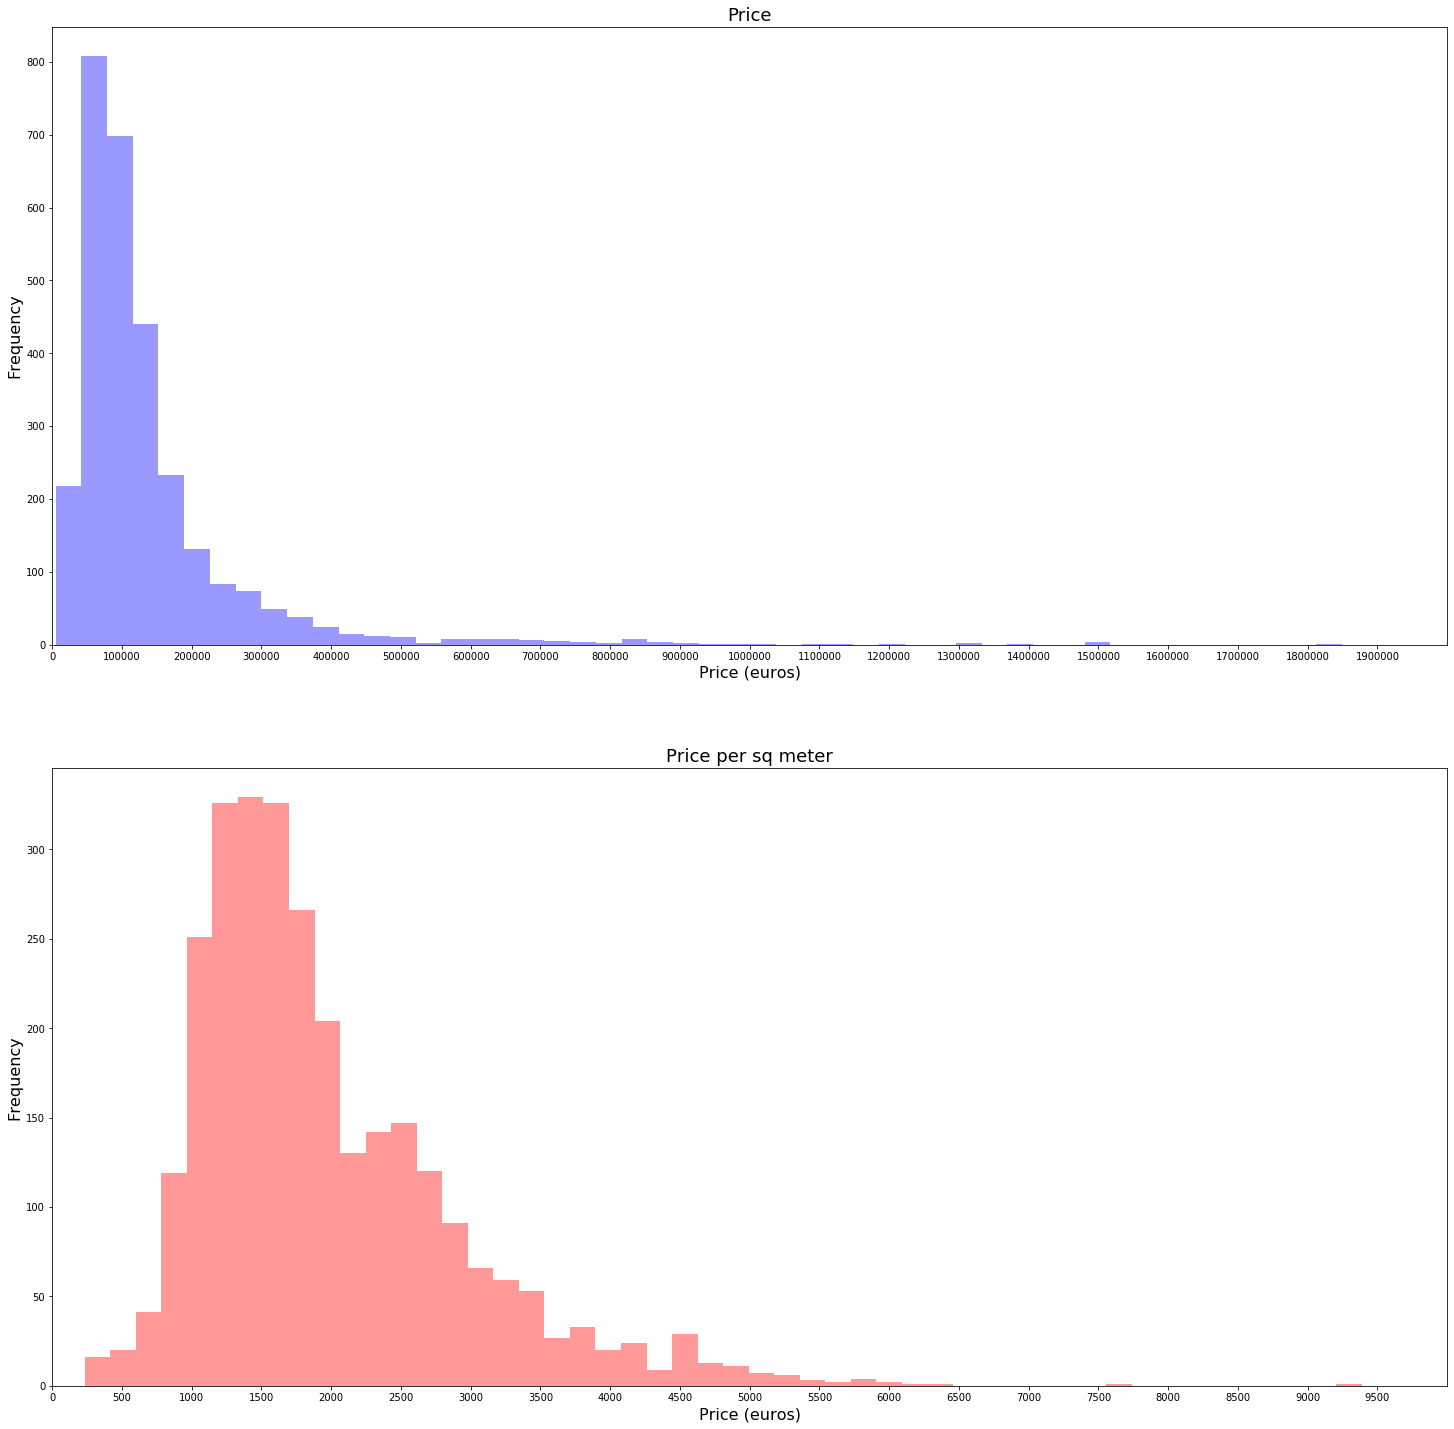

In [638]:
fig,ax =plt.subplots(2,figsize=(25,25))
plot1=sns.distplot(bendra["kaina"],kde=False,color="blue",ax=ax[0])
plot1.set_xlim(0,2000000)
start, end = plot1.get_xlim()
plot1.xaxis.set_ticks(np.arange(start, end,100000))
plot1.set_title('Price', fontsize=18)
plot1.set_xlabel('Price (euros)', fontsize=16)
plot1.set_ylabel('Frequency', fontsize=16)
plot2=sns.distplot(bendra["kaina_kv"],kde=False,color="red",ax=ax[1])
plot2.set_xlim(0,10000)
start, end = plot2.get_xlim()
plot2.xaxis.set_ticks(np.arange(start, end, 500))
plot2.set_title('Price per sq meter', fontsize=18)
plot2.set_xlabel('Price (euros)', fontsize=16)
plot2.set_ylabel('Frequency', fontsize=16)


From the plots we can see that most of the flats costs aruond 100 000 euros. There are some very expensive flats,which cost 1 over billion euros. Considering the price per sq meter, most of flats cost around 1500 euros per sq meter.Also there are cheap flats, which cost less than 500 euros per square meter and expensive flats costing above 7000 or 9000 euros per sq meters.

We can exspress these distribution in numbers.

In [639]:
pd.set_option('float_format', '{0:.2f}'.format)
bendra[["kaina","kaina_kv"]].describe()

,kaina,kaina_kv
count,2900.00,2900.00
mean,137590.12,1957.50
std,139793.46,936.80
min,4800.00,233.00
25%,68000.00,1303.00
50%,96900.00,1706.50
75%,154000.00,2436.00
max,1849000.00,9386.00


From the table above we can see that the most expensive flats costs 1849000 euros, the biggest price per sq meter is 9386 euros.The cheapesst ones accordingly cost 48000 and 233 per sq meter.
We can also make the conclusion that the 25 % of the cheapest flats cost less up to 68000, the middle 50 % of the flats costs between 68000 and 154000, the most expensive 25 % cost from 154000 up to the max value. On average flat costs 137590 euros.

Now we can see which neibourghood and streets have the biggest supply of flats

[Text(0, 0, 'Senamiestis'),
 Text(0, 0, 'Naujamiestis'),
 Text(0, 0, 'Pašilaičiai'),
 Text(0, 0, 'Antakalnis'),
 Text(0, 0, 'Šnipiškės'),
 Text(0, 0, 'Žirmūnai'),
 Text(0, 0, 'Pilaitė'),
 Text(0, 0, 'Naujininkai'),
 Text(0, 0, 'Žvėrynas'),
 Text(0, 0, 'Užupis'),
 Text(0, 0, 'Fabijoniškės'),
 Text(0, 0, 'Baltupiai'),
 Text(0, 0, 'Naujoji Vilnia'),
 Text(0, 0, 'Šeškinė'),
 Text(0, 0, 'Karoliniškės'),
 Text(0, 0, 'Justiniškės'),
 Text(0, 0, 'Lazdynėliai'),
 Text(0, 0, 'Lazdynai'),
 Text(0, 0, 'Jeruzalė'),
 Text(0, 0, 'Valakampiai'),
 Text(0, 0, 'Bajorai'),
 Text(0, 0, 'Viršuliškės'),
 Text(0, 0, 'Santariškės'),
 Text(0, 0, 'Šiaurės miestelis'),
 Text(0, 0, 'Markučiai'),
 Text(0, 0, 'Verkiai'),
 Text(0, 0, 'Grigiškės'),
 Text(0, 0, 'Žemieji Paneriai'),
 Text(0, 0, 'Kalnėnai'),
 Text(0, 0, 'Vilkpėdė'),
 Text(0, 0, 'Visoriai'),
 Text(0, 0, 'Rasos'),
 Text(0, 0, 'Pavilnys'),
 Text(0, 0, 'Salininkai'),
 Text(0, 0, 'Paneriai'),
 Text(0, 0, 'Burbiškės'),
 Text(0, 0, 'Dvarčionys'),
 Text(0, 0, 'T

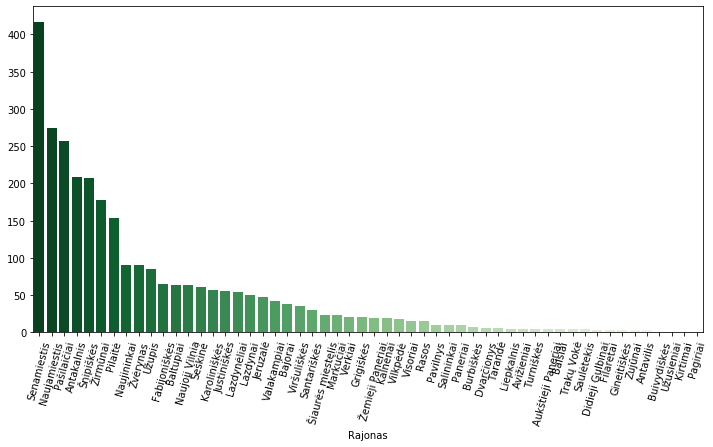

In [640]:
plt.figure(figsize = (12, 6))
Rajonas=bendra.groupby("Rajonas").size().sort_values(ascending=False)
raj=sns.barplot(Rajonas.index,Rajonas.values,order=Rajonas.index,palette="Greens_r")
raj.set_xticklabels(raj.get_xticklabels(),rotation=75)
#raj=Rajonas.plot.bar()
#raj.set_title("Flats for sale per area")
#raj.set_xlabel("Area")
#raj.set_ylabel("N of flats for sale")


We can see taht the biggest amaount of flats is sold in Senamiestis, following by Naujamiestis,Pašilaičiai,Antakalinis,Šnipiškės, Žirmūnai.

Text(0, 0.5, 'N of flats for sale')

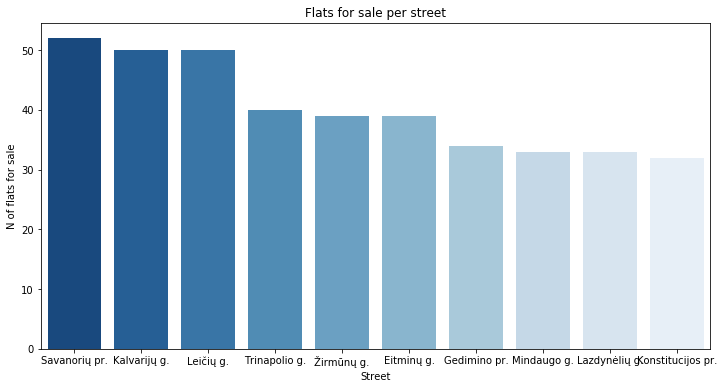

In [641]:
plt.figure(figsize = (12, 6))
Gatves=bendra.groupby("Gatvė").size().sort_values(ascending=False)[:10]
gat=sns.barplot(Gatves.index,Gatves.values,order=Gatves.index,palette="Blues_r")
gat.set_title("Flats for sale per street")
gat.set_xlabel("Street")
gat.set_ylabel("N of flats for sale")

Barplot above shows the most popular streets (Top10) for selling flats.It is interesting that on of these streets are in Senamiestis, which accoording to previous chart has the most flats for sale. So it seems, that sellers tend to write wrong more prestigous area in the ads. Let's check if thera are any flats in Savanoriu pr. which area values are Senamiestis 

In [642]:
bendra.loc[(bendra["Gatvė"]=="Savanorių pr.") & (bendra["Rajonas"]=="Senamiestis")]


,Rajonas,Gatvė,kaina,kaina_kv,plotas,metai_s,metai_r,kambariai,aukstas,tipas,...,nusikaltimai,Šildymo kaina,Šildymo kaina_kv,count,ikimokyklinis,jaunimas,mokyklinio amziaus,pensininkai,vidutinio amziaus,vyresnio amziaus
2034,Senamiestis,Savanorių pr.,225000,2419,93.00,2008,nan,3,14,Monolitinis,...,3,nan,nan,6429.00,7.28,7.25,8.97,22.06,28.70,25.74


We have found one flat in Savanorių pr. which area value is Senamamiestis. Lets try to check Konstitucijos pr. 

In [643]:
bendra.loc[(bendra["Gatvė"]=="Konstitucijos pr.") & (bendra["Rajonas"]=="Senamiestis")]

,Rajonas,Gatvė,kaina,kaina_kv,plotas,metai_s,metai_r,kambariai,aukstas,tipas,...,nusikaltimai,Šildymo kaina,Šildymo kaina_kv,count,ikimokyklinis,jaunimas,mokyklinio amziaus,pensininkai,vidutinio amziaus,vyresnio amziaus
2572,Senamiestis,Konstitucijos pr.,651063,4900,132.87,2019,nan,4,22,Monolitinis,...,9,94.34,0.71,346.00,8.09,4.91,13.58,13.87,41.04,18.50
2574,Senamiestis,Konstitucijos pr.,387933,4550,85.26,2019,nan,3,18,Monolitinis,...,9,60.53,0.71,346.00,8.09,4.91,13.58,13.87,41.04,18.50


Let's now check the distribution of the prices according to the top 10 areas(number of flats for sale) in a visual way with boxplots.

Text(0, 0.5, 'Price')

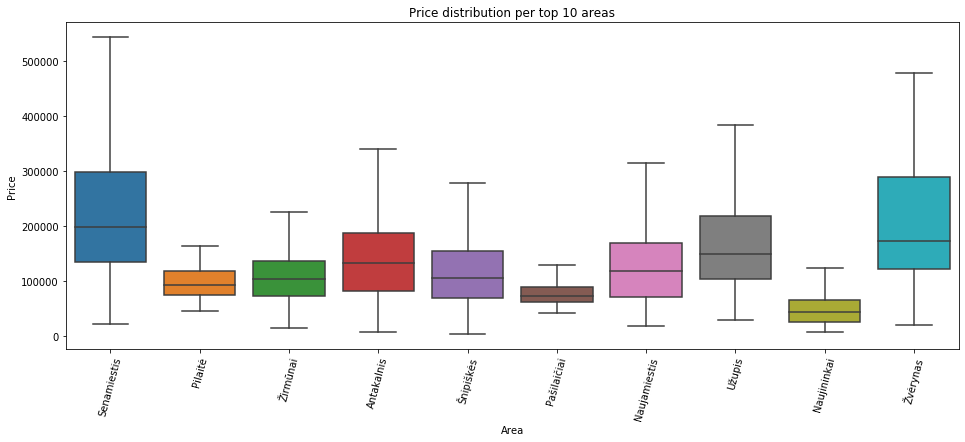

In [644]:
top_10_area=bendra.groupby("Rajonas").size().sort_values(ascending=False)[:10]
b=top_10_area.index.tolist()
#bendra_topa["Rajonas"]=bendra_topa["Rajonas"].astype(str)
bendra["Rajonas"]=bendra["Rajonas"].astype(str)
bendra_topa=bendra[bendra["Rajonas"].isin(b)]

#bendra_topa=bendra[bendra["Rajonas"].isin(b)]
plt.figure(figsize=(16, 6))
area=sns.boxplot(y=bendra_topa.kaina,x=bendra_topa.Rajonas,showfliers=False)
area.set_xticklabels(area.get_xticklabels(), rotation=75)
area.set_title("Price distribution per top 10 areas")
area.set_xlabel("Area")
area.set_ylabel("Price")




                                          

We can see that the distributions of the prices differ depending on the area. Area with the highest median price Senamiestis and Žvėrynas also have the most spread distrubution of the price, so the prices vary a lot in these areas. In Žverynas case 3 third quartile is further away from median comapring to first quartile, meanining that more expensive flats have wider distribution, when cheaper ones in Žverynas.
In the areas with lowest median prices Naujininkai, Pašilaičiai the price range is much more narrow. So in these areas the flats cost more or less the same, the most narow distribution is in Pašilaičiai.


We can get the information of boxplots in numeric way 

In [645]:
bendra_topa.groupby("Rajonas").agg({"kaina":"describe"})

kaina                                                   \
              count      mean       std      min       25%       50%   
Rajonas                                                                
Antakalnis   209.00 154445.89 115621.44  8200.00  81900.00 133500.00   
Naujamiestis 274.00 155829.43 150021.67 17995.00  72485.00 119450.00   
Naujininkai   91.00  55658.99  46376.77  7800.00  25330.00  44000.00   
Pašilaičiai  257.00  78435.17  22731.12 42000.00  62000.00  73500.00   
Pilaitė      153.00  99263.36  34575.69 45999.00  75900.00  92500.00   
Senamiestis  417.00 248582.73 197066.48 23310.00 135000.00 198000.00   
Užupis        85.00 191849.72 149095.43 29500.00 103573.00 150200.00   
Šnipiškės    207.00 161737.97 232591.72  4800.00  69450.00 105857.00   
Žirmūnai     178.00 123300.57  80255.26 15999.00  73500.00 104096.50   
Žvėrynas      91.00 235505.53 179578.31 20370.00 122500.00 173000.00   

                                   
                   75%        max  
Rajonas                            
Antakalnis   187131.00 1014248.00  
Naujamiestis 170000.00  890000.00  
Naujininkai   66500.00  329000.00  
Pašilaičiai   89999.00  170000.00  
Pilaitė      118500.00  299900.00  
Senamiestis  299000.00 1849000.00  
Užupis       219500.00 1125000.00  
Šnipiškės    155116.00 1500000.00  
Žirmūnai     137798.50  495000.00  
Žvėrynas     290000.00  900000.00

Now lets see how price and price per sq are correlated with other numeric indicators in our data.

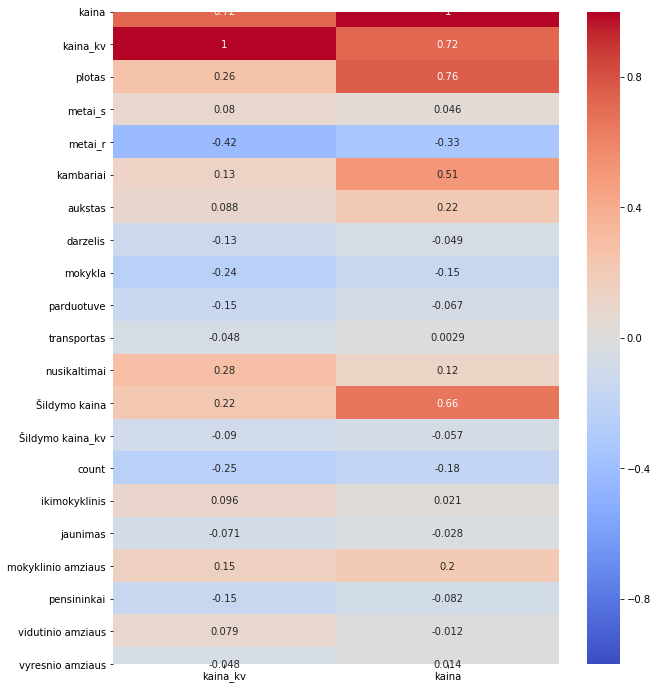

In [646]:
numbers = bendra.select_dtypes(include=[np.number])
numbers_corr=numbers.corr()
plt.figure(figsize=(10,12))
sns.heatmap(numbers_corr[["kaina_kv","kaina"]],
            vmin=-1,
            cmap='coolwarm',
            annot=True)

From correlation analsys we can conclude that none of the indicators are highly correlated with price indicators.Naturally the price is correlated with floorspace of the flat and number of rooms.Howewer price per square meter is less correlated with those two indicators. Quite ironnically the price per square meter is positively correlated with number of crime aroun the flat- the more crimes ara commited the higher is the price, but is relationship is still weekk. Concerning the demografics of the street, we can see that the more schoolgoers lives on the street the higher is the price and opposite relationship with pensionist living on the street (still low correlations). We can also see that the further away is the school the less the flat costs.

Let's plot the relation between price per square meter and numebr of crimes around, but only take the top 10 area for sake of clarity.

Text(35.21024848090278, 0.5, 'Price per sq meter')

<Figure size 1080x2160 with 0 Axes>

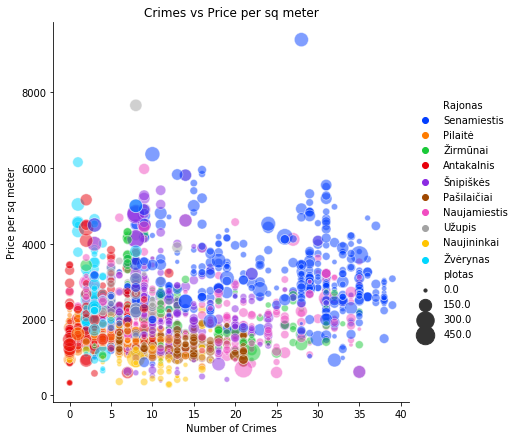

In [647]:
plt.figure(figsize=(15,30))
c=sns.relplot("nusikaltimai", "kaina_kv", hue="Rajonas", size="plotas",
            sizes=(10, 340), alpha=.5, palette="bright",
            height=6, data=bendra_topa)
axes = c.axes.flatten()
axes[0].set_title("Crimes vs Price per sq meter")
axes[0].set_xlabel("Number of Crimes")
axes[0].set_ylabel("Price per sq meter")

No clear relationship is visible. And it seems that the most crimes is commited in Senamiestis area, possible due to lively nightlife and etc. Let's check the mean number of crime by area.

In [648]:
bendra.groupby("Rajonas").agg({"nusikaltimai":'mean'}).sort_values("nusikaltimai",ascending=False)

,nusikaltimai
Rajonas,
Senamiestis,23.25
Naujamiestis,16.55
Šiaurės miestelis,14.04
Žirmūnai,13.55
Pašilaičiai,12.99
Šnipiškės,12.62
Karoliniškės,10.60
Justiniškės,10.59
Naujininkai,9.82


So that true the average of crimes are highest in Senamiestis

Let's chech the most common building, heating and instalation types.

[Text(0, 0, 'Įrengtas'),
 Text(0, 0, 'Dalinė apdaila'),
 Text(0, 0, 'Kita'),
 Text(0, 0, 'Neįrengtas'),
 Text(0, 0, 'Nebaigtas statyti')]

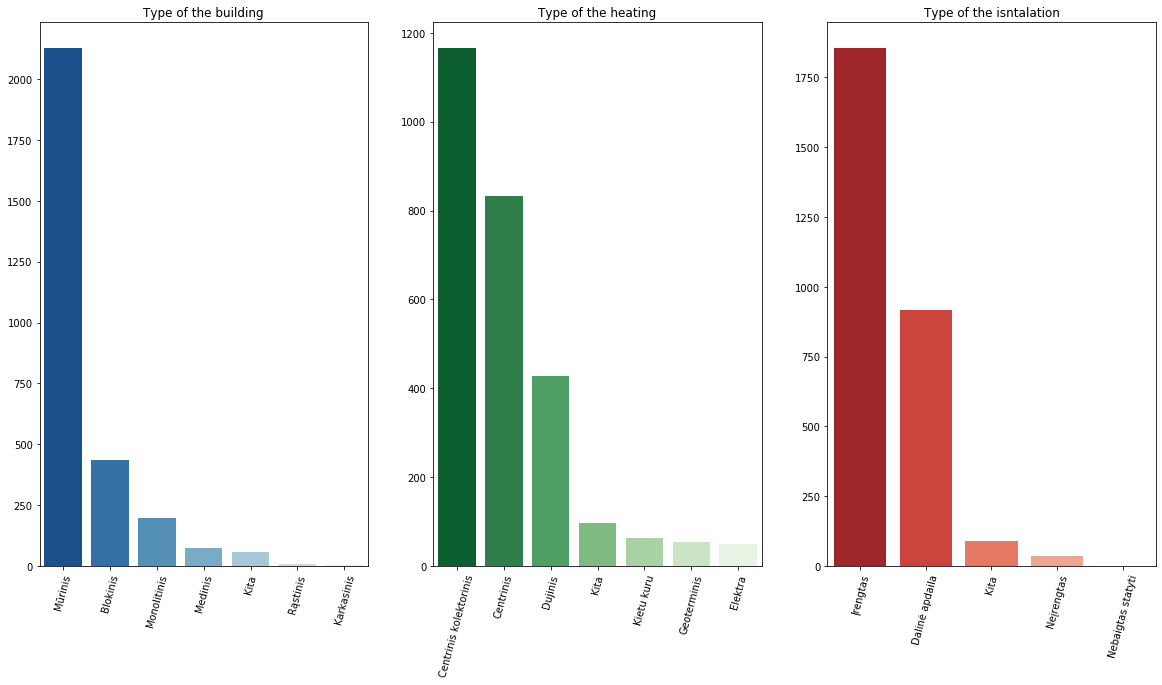

In [649]:
heating=bendra.groupby("sildymas").size().sort_values(ascending=False)[:7]
type_b=bendra.groupby("tipas").size().sort_values(ascending=False)[:7]
state=bendra.groupby("irengimas").size().sort_values(ascending=False)[:5]
figure,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
sns.barplot(type_b.index,type_b.values,order=type_b.index,palette="Blues_r",ax=ax1)
sns.barplot(heating.index,heating.values,order=heating.index,palette="Greens_r",ax=ax2)
sns.barplot(state.index,state.values,order=state.index,palette="Reds_r",ax=ax3)
ax1.set_title("Type of the building")
ax2.set_title("Type of the heating")
ax3.set_title("Type of the isntalation")
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=75)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=75)

We can see that wast majority of flats for sale are in brick houses followed by block houses.
The most common heating system is central heating either simple or collectoral, the third mos common option - gas heating.
Most of the flats for sale are fully installed followed by half installed. The flats that are uninstalled are rarity.

And now chech how the flats are distributed by the years of building.


[Text(150.125, 0.5, 'N'), Text(0.5, 69.0, 'Years')]

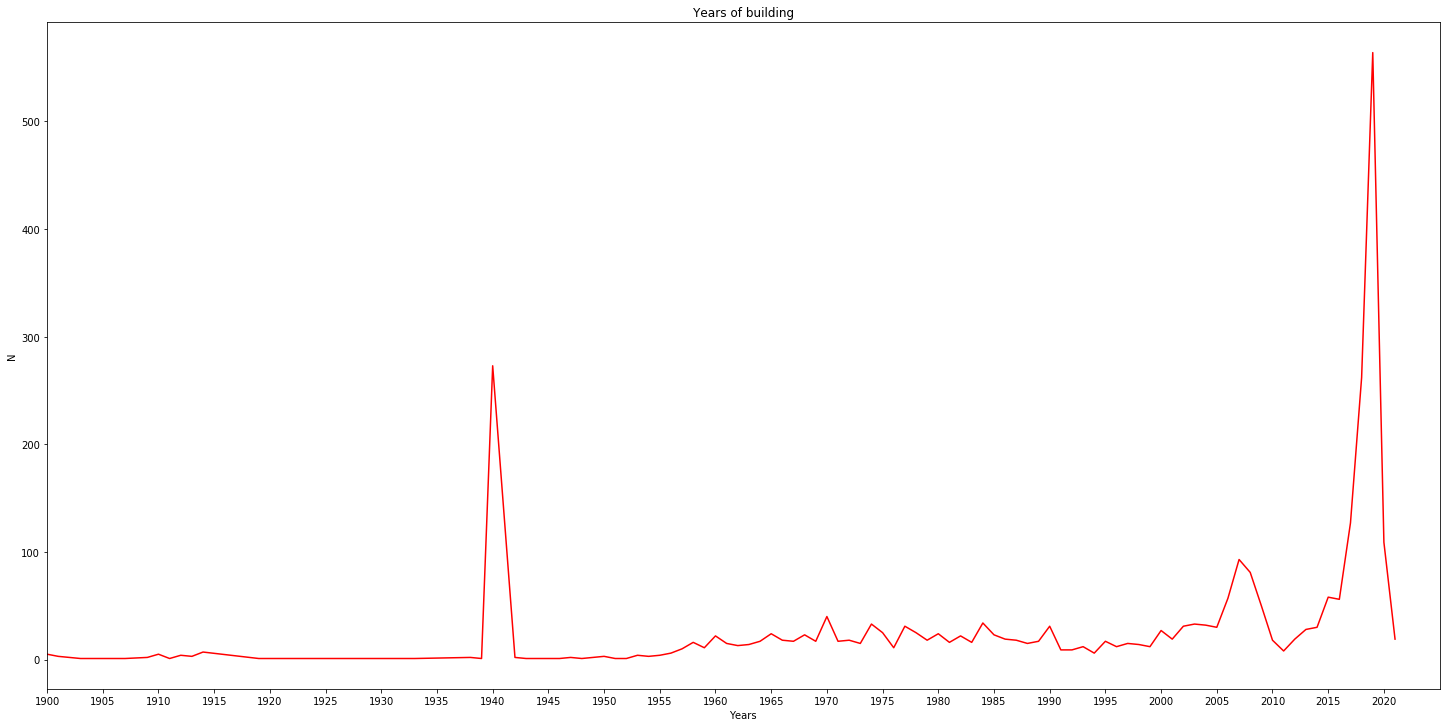

In [650]:
years=bendra.groupby("metai_s").size().sort_values(ascending=False)


plt.figure(figsize=(20,10))
yrs=sns.lineplot(years.index,years.values,color="red")
plt.tight_layout()
yrs.set_xlim(1900,2025)
start, end = yrs.get_xlim()
yrs.xaxis.set_ticks(np.arange(start, end, 5))
yrs.set_title("Years of building")
yrs.set(xlabel="Years",ylabel="N")





As we can see most of the flats for sale are new. The second biggest spike is around years 1940, the third - befor years 2010.